In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [19]:
df_brakes=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\luminar\\ml_project\\final\\datasets\\brakes_suspension_health.csv")
df_brakes  

,Car_ID,Brake_Pad_Wear,Brake_Fluid_Level,Suspension_Stiffness,Shock_Absorber_Condition,Brakes_Suspension_Remaining_Years
0,1,24.851013,88.227217,0.705877,2.888608,8.537554
1,2,44.997542,44.363744,3.647894,8.409286,10.000000
2,3,41.094080,84.166390,5.091245,6.740616,9.952775
3,4,26.029969,85.899538,0.384911,6.508754,9.827415
4,5,NaN,49.009979,7.260616,7.657915,7.512379
...,...,...,...,...,...,...
5995,5996,NaN,98.143332,7.816081,7.280491,8.085206
5996,5997,60.755113,NaN,5.347666,0.457734,5.793117
5997,5998,69.139331,75.198855,2.655282,0.882966,4.684982
5998,5999,47.955588,47.452696,7.782871,9.333187,10.000000


In [20]:
df_brakes.head()


,Car_ID,Brake_Pad_Wear,Brake_Fluid_Level,Suspension_Stiffness,Shock_Absorber_Condition,Brakes_Suspension_Remaining_Years
0,1,24.851013,88.227217,0.705877,2.888608,8.537554
1,2,44.997542,44.363744,3.647894,8.409286,10.000000
2,3,41.094080,84.166390,5.091245,6.740616,9.952775
3,4,26.029969,85.899538,0.384911,6.508754,9.827415
4,5,NaN,49.009979,7.260616,7.657915,7.512379


In [21]:
df_brakes.tail()

,Car_ID,Brake_Pad_Wear,Brake_Fluid_Level,Suspension_Stiffness,Shock_Absorber_Condition,Brakes_Suspension_Remaining_Years
5995,5996,NaN,98.143332,7.816081,7.280491,8.085206
5996,5997,60.755113,NaN,5.347666,0.457734,5.793117
5997,5998,69.139331,75.198855,2.655282,0.882966,4.684982
5998,5999,47.955588,47.452696,7.782871,9.333187,10.000000
5999,6000,90.658117,86.217468,2.940020,9.285297,6.541676


In [22]:
df_brakes.isna().sum()

Car_ID                                 0
Brake_Pad_Wear                       447
Brake_Fluid_Level                    475
Suspension_Stiffness                 467
Shock_Absorber_Condition             287
Brakes_Suspension_Remaining_Years      0
dtype: int64

In [23]:
df_brakes.dtypes

Car_ID                                 int64
Brake_Pad_Wear                       float64
Brake_Fluid_Level                    float64
Suspension_Stiffness                 float64
Shock_Absorber_Condition             float64
Brakes_Suspension_Remaining_Years    float64
dtype: object

In [24]:
df_brakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Car_ID                             6000 non-null   int64  
 1   Brake_Pad_Wear                     5553 non-null   float64
 2   Brake_Fluid_Level                  5525 non-null   float64
 3   Suspension_Stiffness               5533 non-null   float64
 4   Shock_Absorber_Condition           5713 non-null   float64
 5   Brakes_Suspension_Remaining_Years  6000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 281.4 KB


In [25]:
df_brakes.describe()

,Car_ID,Brake_Pad_Wear,Brake_Fluid_Level,Suspension_Stiffness,Shock_Absorber_Condition,Brakes_Suspension_Remaining_Years
count,6000.000000,5553.000000,5525.000000,5533.000000,5713.000000,6000.000000
mean,3000.500000,52.321829,56.826407,5.006016,5.059688,7.976296
std,1732.195139,31.133515,25.316142,2.893985,2.871431,2.257010
min,1.000000,0.018307,0.042599,0.005584,0.002288,0.286005
25%,1500.750000,25.427032,36.184931,2.524225,2.572661,6.468383
50%,3000.500000,52.678239,57.592869,4.995036,5.098322,8.694716
75%,4500.250000,77.930992,78.340638,7.513761,7.538606,10.000000
max,6000.000000,119.746331,99.963195,9.998098,9.999342,10.000000


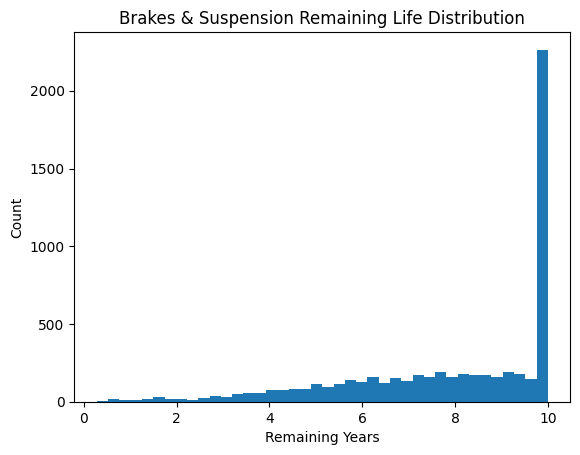

In [26]:
plt.hist(df_brakes["Brakes_Suspension_Remaining_Years"], bins=40)
plt.xlabel("Remaining Years")
plt.ylabel("Count")
plt.title("Brakes & Suspension Remaining Life Distribution")
plt.show()


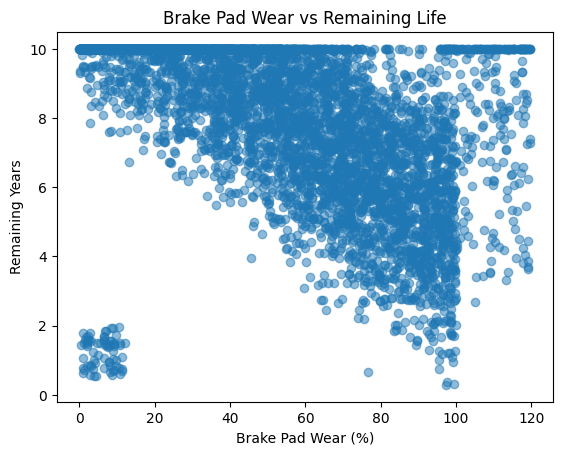

In [27]:
plt.scatter(
    df_brakes["Brake_Pad_Wear"],
    df_brakes["Brakes_Suspension_Remaining_Years"],
    alpha=0.5
)
plt.xlabel("Brake Pad Wear (%)")
plt.ylabel("Remaining Years")
plt.title("Brake Pad Wear vs Remaining Life")
plt.show()


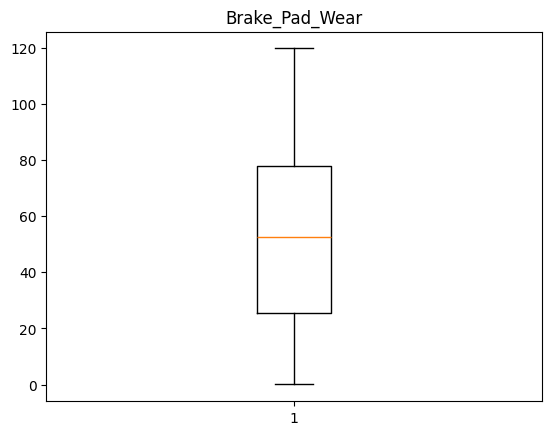

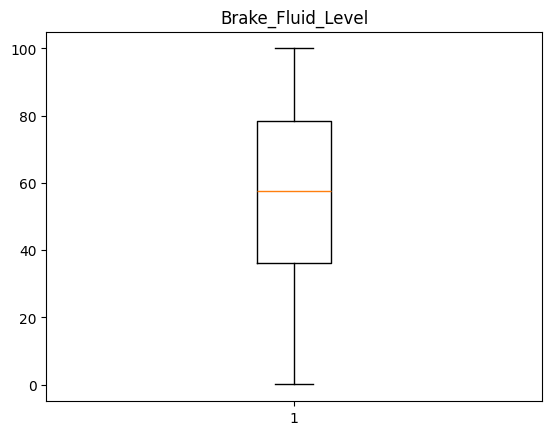

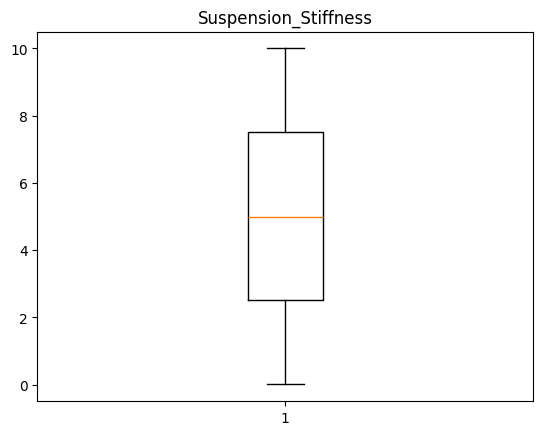

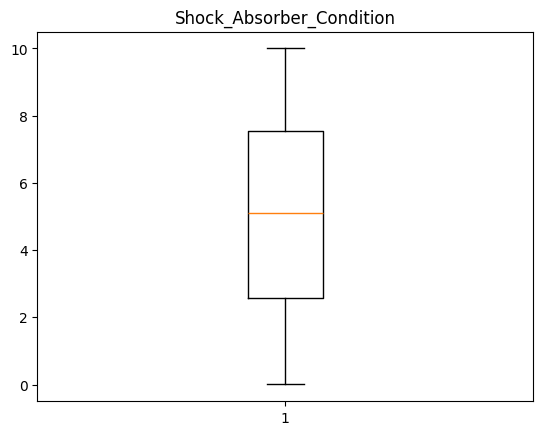

In [28]:
features = [
    "Brake_Pad_Wear",
    "Brake_Fluid_Level",
    "Suspension_Stiffness",
    "Shock_Absorber_Condition"
]

for col in features:
    plt.boxplot(df_brakes[col].dropna())
    plt.title(col)
    plt.show()


In [29]:
x = df_brakes.drop(
    columns=["Brakes_Suspension_Remaining_Years", "Car_ID"]
)
y = df_brakes["Brakes_Suspension_Remaining_Years"]

for col in x.columns:
    x[col] = x[col].fillna(x[col].median())


In [30]:
for col in x.columns:
    lower = x[col].quantile(0.01)
    upper = x[col].quantile(0.99)
    x[col] = x[col].clip(lower, upper)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=42
)


In [32]:
model = RandomForestRegressor(
    n_estimators=220,
    max_depth=11,
    min_samples_leaf=6,
    random_state=42
)

model.fit(x_train, y_train)


,n_estimators,220
,criterion,'squared_error'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
y_pred = model.predict(x_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))


MAE : 0.7175590830651688
RMSE: 1.2195682938065249
R2  : 0.7163435068815085


In [34]:
print("Train R2:", model.score(x_train, y_train))
print("Test R2 :", model.score(x_test, y_test))


Train R2: 0.7849564208585421
Test R2 : 0.7163435068815085
